# ANLY530 Final Project (Absenteeism at Work)
Team 4

## Load absenteeism_at_work.train.csv file

In [148]:
# Course project: Absentism at Work

#import data
import pandas as pd 
input_file = "C:\\Users\\Jaji\\Downloads\\Absenteeism_at_work_train.csv"
absent = pd.read_csv(input_file) 
absent.head(5)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


## Data Exploration/ Preprocessing
The code below shows there is an instance in the 'Age' clomn with a value of 'R' (will be dropped). It also has an 'object' data type as well as 'Work load Average/day' column which will be converted to the appropriate data type.

In [149]:
# Explore data
absent.info()
#Explore Object features 'Age' and 'Work load Average/day'
print(absent['Age'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    object 
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [151]:
#Drop record #376 where Age == 'R'
absent = absent.drop([376]).reset_index(drop=True)
absent.shape

(665, 21)

In [8]:
# REINDEX THE TABLE

#absent.reindex(method = 'bfill')

#print(absent.loc[376])


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,17,16,4,3,3,179,22,17,40,"246,288",...,0,2,2,0,1,0,63.0,170,22,2
662,36,23,4,3,3,118,13,18,50,"246,288",...,0,1,1,1,0,0,98.0,178,31,3
663,10,23,4,3,3,361,52,3,28,"246,288",...,0,1,1,1,0,4,80.0,172,27,2
664,34,10,4,4,3,118,10,10,37,"246,288",...,0,1,0,0,0,0,83.0,172,28,2


In [152]:
# Verify the Age values are clean now:
print(absent['Age'].value_counts())

#Now we see - all good with Age - can convert to int
absent['Age'] = absent['Age'].astype(str).astype(int)

#It worked!

38    112
28    109
37     67
40     50
33     48
36     47
30     35
50     31
41     31
34     25
47     24
43     21
31     17
32      9
39      7
29      7
27      7
58      6
49      5
48      5
46      1
0       1
Name: Age, dtype: int64


In [153]:
#Explore and clear feature 'Work load Average/day '
# A catch that took forever to fin - 'Work load Average/day ' has a <Space> symbol at the end
# This how I used to call this column before:
#absent.columns.tolist() # List all columns
#col = absent.columns.tolist()
#print(absent[col[11]])
print(absent['Work load Average/day '])

# It is not quite clear what this field ('Work load Average/day ') means, 
# but the comma prevents us from converting this field to numeric directly
# let's try to get rid of comma

0      239,554
1      239,554
2      239,554
3      239,554
4      239,554
        ...   
660    246,288
661    246,288
662    246,288
663    246,288
664    246,288
Name: Work load Average/day , Length: 665, dtype: object


In [166]:
#See the summary of the data
absent.info()
# Different number of record for different features here: 664, 665, 666
# Drop meaningless features: ID
#absent = absent.drop(['ID'], axis=1)
#type(absent['Work load Average/day '])

# Data type for this column is incosistent, sometimes shows object and sometimes inte 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               665 non-null    int64  
 1   Month of absence                 665 non-null    int64  
 2   Day of the week                  665 non-null    int64  
 3   Seasons                          665 non-null    int64  
 4   Transportation expense           665 non-null    int64  
 5   Distance from Residence to Work  665 non-null    int64  
 6   Service time                     665 non-null    int64  
 7   Age                              665 non-null    int32  
 8   Work load Average/day            665 non-null    object 
 9   Hit target                       664 non-null    float64
 10  Disciplinary failure             665 non-null    int64  
 11  Education                        665 non-null    int64  
 12  Son                   

##  Handling Missing Values

In [171]:
# Check Missing values
print(absent.isna().any(axis=1).value_counts())
### We have 3 missing values

# Drop records with missing values
absNoMiss = absent.dropna(axis=0)
print(absNoMiss.isna().any(axis=1).value_counts())
### Check again - looks good

False    662
True       3
dtype: int64
False    662
dtype: int64


## Drop Column(s)
Two columns were dropped, the 'ID'and 'Work load Average/day ' columns
'ID' column is irrelevant and also had repeating numbers
'Work load Average/day ' column has ambiguous data type, sometimes shows objectSeries datatype and scaling the column was a challenge.

In [172]:

#remove the variable 'Work load Average/day ' 
absNoMiss = absNoMiss.drop(['Work load Average/day '], axis=1)
absNoMiss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 664
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               662 non-null    int64  
 1   Month of absence                 662 non-null    int64  
 2   Day of the week                  662 non-null    int64  
 3   Seasons                          662 non-null    int64  
 4   Transportation expense           662 non-null    int64  
 5   Distance from Residence to Work  662 non-null    int64  
 6   Service time                     662 non-null    int64  
 7   Age                              662 non-null    int32  
 8   Hit target                       662 non-null    float64
 9   Disciplinary failure             662 non-null    int64  
 10  Education                        662 non-null    int64  
 11  Son                              662 non-null    int64  
 12  Social drinker        

## Outliers
The code below removes all outliers by computing the Z scores of each column is computed and then the absolute value of Z scpre iff it is below 3. The parameter 'axis=1' ensures that, for each row all columns satisffy the condition after which the result is used to index the the dataframe

In [173]:
#Identify and remove outliers
import numpy as np
from scipy import stats 

absNoOut = absNoMiss[(np.abs(stats.zscore(absNoMiss)) < 3).all(axis=1)] 

# How many data points were dropped? 
print('Number of dropped instances= ',absNoMiss.shape[0]-absNoOut.shape[0])

Number of dropped instances=  138


In [174]:
# See details about the Target Variable: Absenteeism time in hours
absNoOut['Absenteeism time in hours'].describe()


count    524.000000
mean       5.402672
std        5.815854
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max       40.000000
Name: Absenteeism time in hours, dtype: float64

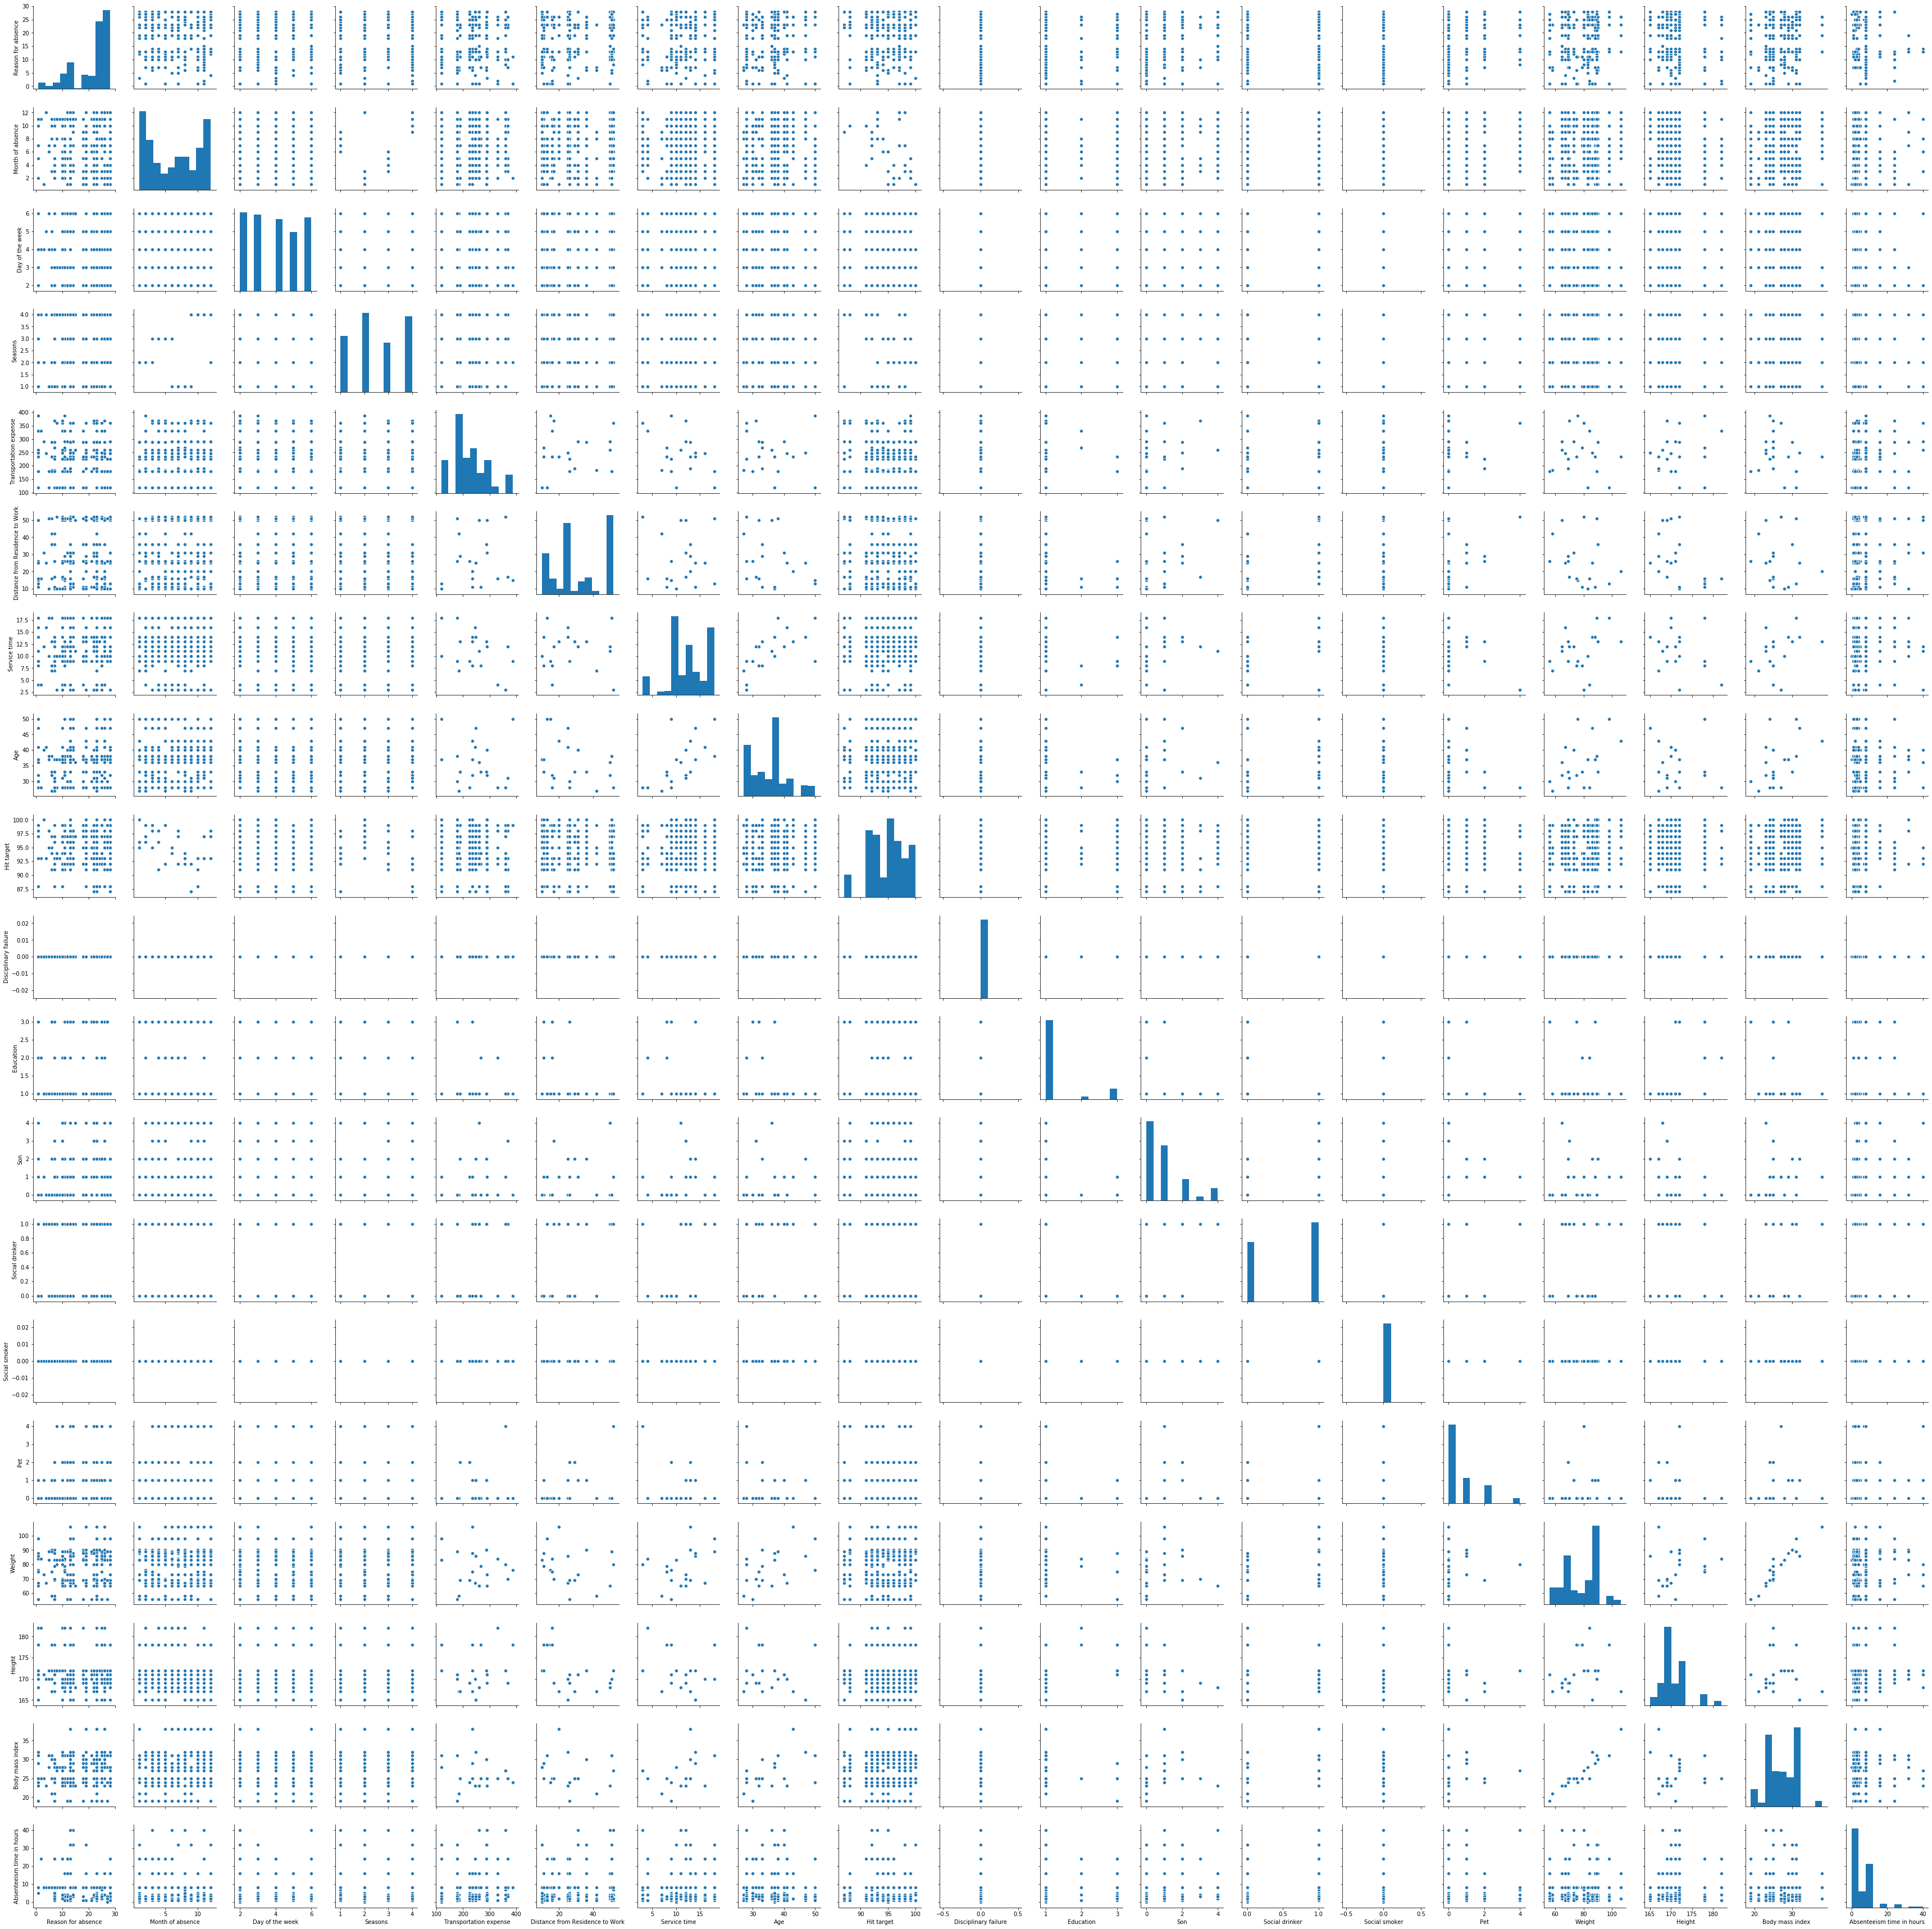

In [50]:
# Seaborn visualization library
import seaborn as sns
# Vizualize ALL variables - create the default pairplot
sns.pairplot(absNoOut)

In [51]:
# Scale the data
#from sklearn.preprocessing import scale 
#absNoOut['Work load Average/day '] = scale(absNoOut['Work load Average/day '])
#absentScaled


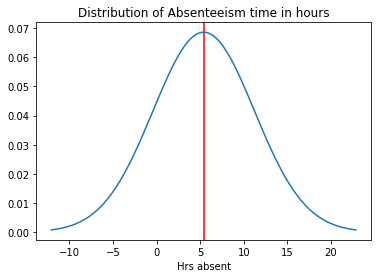

In [175]:
# Close look on the distribution of a variable Absenteeism time in hours
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
mu = absNoOut['Absenteeism time in hours'].mean() 
sigma = absNoOut['Absenteeism time in hours'].std() 
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) 
plt.axvline(x=mu,color='r') 
plt.plot(x, norm.pdf(x,mu,sigma)) 
plt.title('Distribution of Absenteeism time in hours') 
plt.xlabel('Hrs absent') 
plt.show()
#looks normal - ok

In [176]:
# Store target variable in a new variable
hrsAbs = absNoOut['Absenteeism time in hours']

# Drop target variable from the dataset
X = absNoOut.drop(['Absenteeism time in hours'], axis=1)

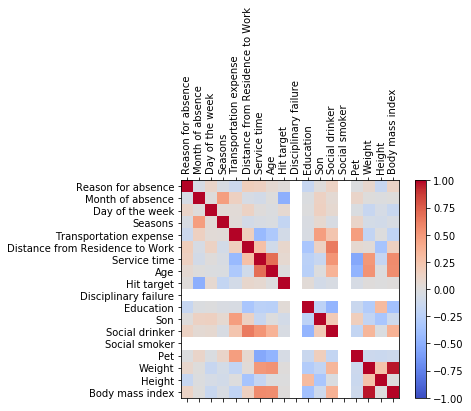

In [177]:
#Identify and eliminate correlated variables
import matplotlib.pyplot as plt 
import numpy as np

corr = X.corr() 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,len(X.columns),1) 
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(X.columns) 
ax.set_yticklabels(X.columns) 
plt.show()

In [178]:
# Create correlation matrix 
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) 

In [179]:
# Find index of feature columns with correlation greater than 0.75 (highly correlated 
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)] 
Xnew = X.drop(to_drop, axis=1)
# See the variable we drop
print(to_drop)

['Body mass index']


In [180]:
#Review the dataframe before building the model
Xnew.info()

# We will work with only 17 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 664
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               524 non-null    int64  
 1   Month of absence                 524 non-null    int64  
 2   Day of the week                  524 non-null    int64  
 3   Seasons                          524 non-null    int64  
 4   Transportation expense           524 non-null    int64  
 5   Distance from Residence to Work  524 non-null    int64  
 6   Service time                     524 non-null    int64  
 7   Age                              524 non-null    int32  
 8   Hit target                       524 non-null    float64
 9   Disciplinary failure             524 non-null    int64  
 10  Education                        524 non-null    int64  
 11  Son                              524 non-null    int64  
 12  Social drinker        

In [181]:
Xnew.shape

(524, 17)

In [182]:
#Task 1- Mandatory: Since the target variable is continuous, we break it to some smaller sub groups: 
#Group 0: Number of hours=0 
#Group 1: 0 < Number of hours <= 6 
#Group 2: Number of hours > 6 
AbsGroup = pd.cut(hrsAbs,bins=[-1,0,6,200],labels=['0','1','2'])

## Splitting data to train and test

In [190]:
### Splitting data
from sklearn import model_selection
y = AbsGroup
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xnew,y,test_size=0.30,random_state=52)
X_train.describe()
X_test.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000
mean,21.930380,5.822785,3.898734,2.525316,219.018987,33.594937,12.670886,35.949367,95.012658,0.0,1.221519,0.759494,0.594937,0.0,0.696203,78.968354,170.594937
std,6.763632,3.519769,1.424042,1.080807,62.813390,14.926161,4.472767,5.798965,3.125786,0.0,0.614303,1.043209,0.492465,0.0,1.086740,11.370103,2.841992
min,1.000000,1.000000,2.000000,1.000000,118.000000,10.000000,3.000000,27.000000,87.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,56.000000,165.000000
25%,19.000000,3.000000,3.000000,2.000000,179.000000,25.000000,9.000000,30.000000,93.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,69.000000,169.000000
50%,23.000000,6.000000,4.000000,2.000000,225.000000,27.500000,12.500000,37.000000,95.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,83.000000,170.000000
75%,27.000000,9.000000,5.000000,4.000000,248.000000,51.000000,18.000000,38.000000,97.750000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,89.000000,172.000000
max,28.000000,12.000000,6.000000,4.000000,361.000000,52.000000,18.000000,50.000000,100.000000,0.0,3.000000,4.000000,1.000000,0.0,4.000000,106.000000,182.000000


## Prediction models 

### Model 1: Decision Tree Model

In [191]:
#  MODEL #1: Decision tree
from sklearn import tree
modelTree = tree.DecisionTreeClassifier()  # create model
modelTree = modelTree.fit(X_train, y_train)    # fill the model

###Evaluating Model Performance 
from sklearn import metrics
y_predict_tree = modelTree.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict_tree)) 
print(metrics.accuracy_score(y_test, y_predict_tree)*100)




# Decision tree model accuracy - 84.8%

[[ 0  1  0]
 [ 0 98  8]
 [ 0 13 38]]
86.07594936708861


## Feature Importance Table

In [192]:
# Find out which features are most important
from sklearn.tree import DecisionTreeRegressor
feature_importances = pd.DataFrame(modelTree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print('Decision Tree Regressor Feature Importance:')
feature_importances.head(12)

Decision Tree Regressor Feature Importance:


,importance
Reason for absence,0.459736
Month of absence,0.099846
Transportation expense,0.082143
Weight,0.079740
Hit target,0.078799
Day of the week,0.039145
Service time,0.038555
Seasons,0.033832
Age,0.028240
Distance from Residence to Work,0.020728


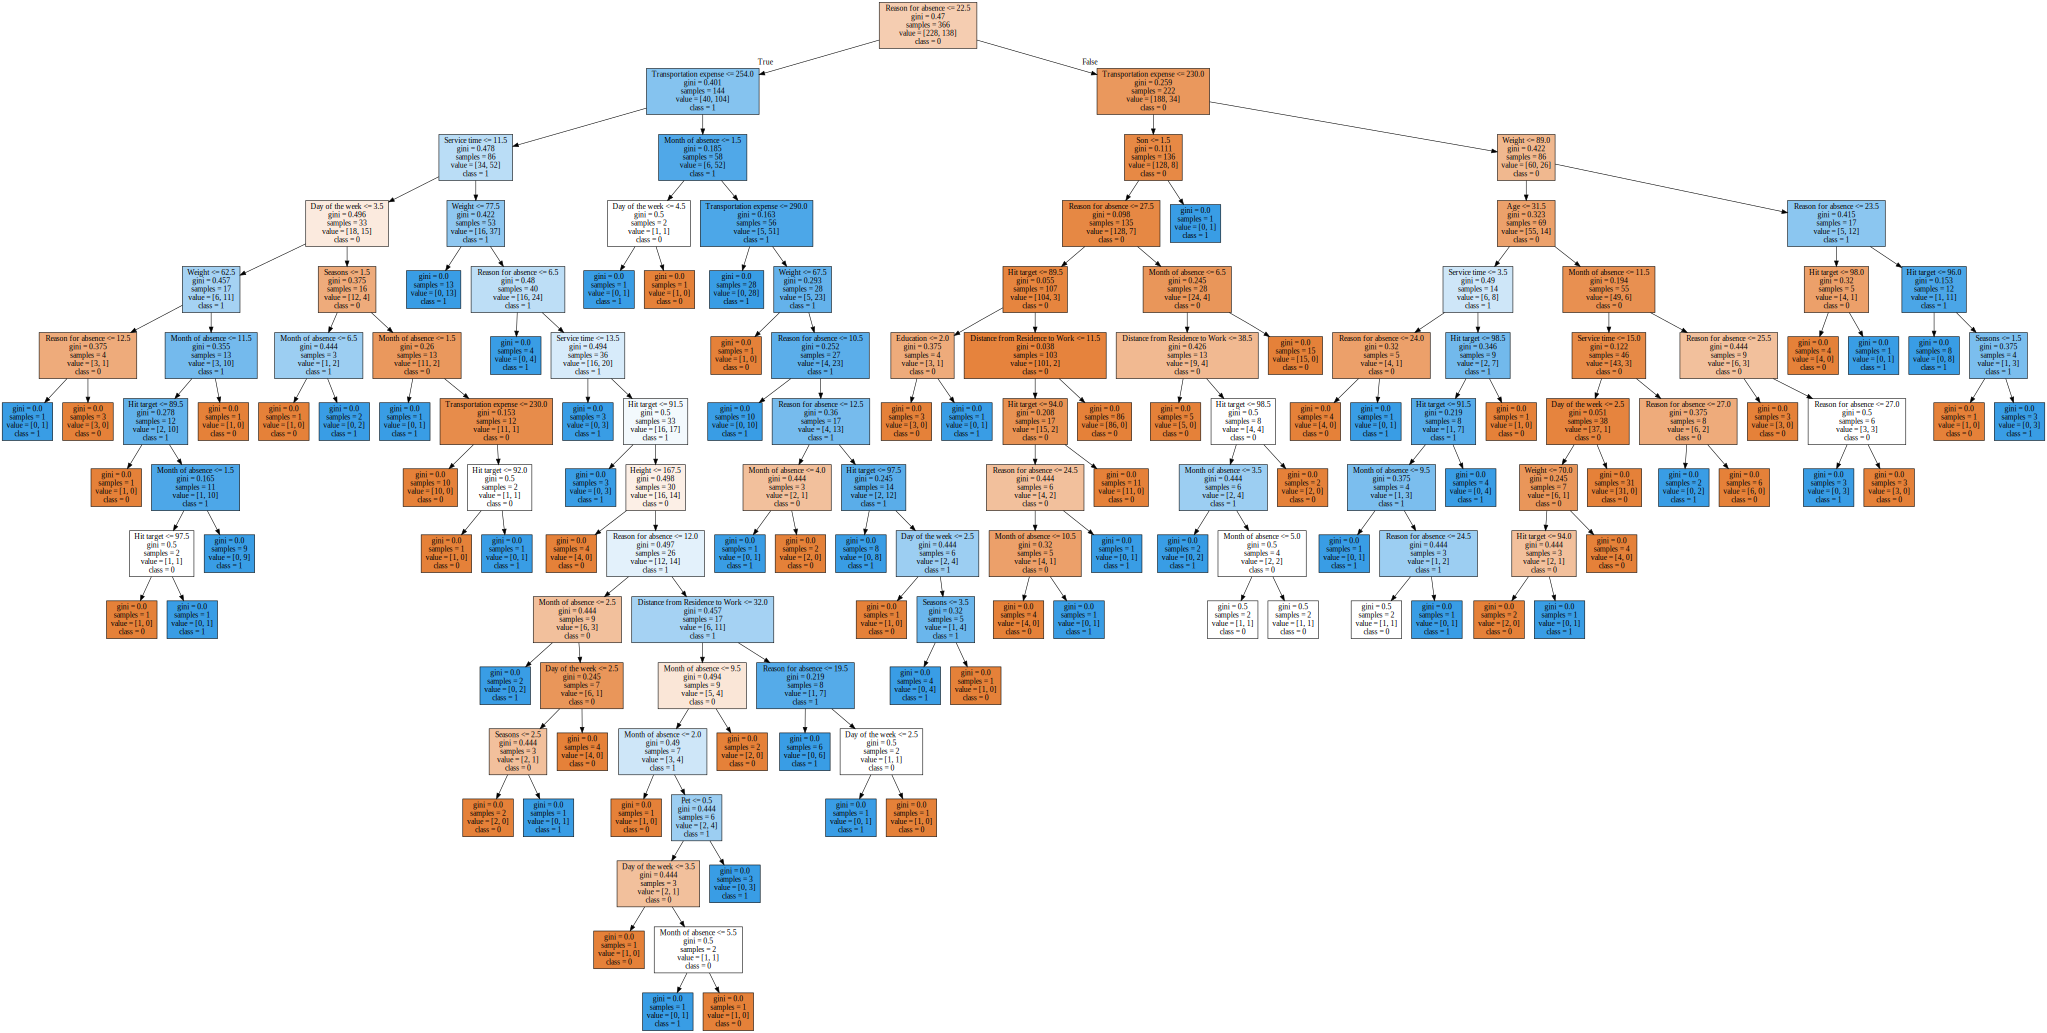

In [194]:
# Visualize Decision Tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
absgraph = Source(tree.export_graphviz(modelTree, out_file=None,
feature_names=X_test.columns, class_names=['0', '1','2'], filled = True))
display(SVG(absgraph.pipe(format='svg')))

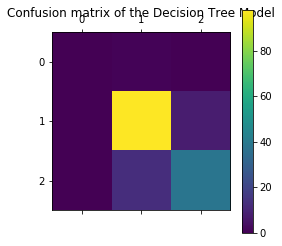

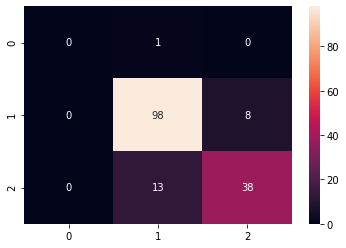

In [195]:
#Further Evaluation of Decision Tree:revisiting for part 5
from sklearn.metrics import confusion_matrix 
import pylab as pl
CM_tree=confusion_matrix(y_test, y_predict_tree)
pl.matshow(CM_tree)
pl.title('Confusion matrix of the Decision Tree Model')
pl.colorbar()
pl.show()
import seaborn as sns

sns.heatmap(CM_tree, annot=True)



In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_tree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.92      0.90       106
           2       0.83      0.76      0.80        51

    accuracy                           0.87       158
   macro avg       0.57      0.56      0.57       158
weighted avg       0.86      0.87      0.86       158



## Model 2: Siupport Vaector Machine (Linear)

In [197]:
# Model 2: SVM, using a linear separator

from sklearn import svm
# Design the model
clf = svm.SVC(kernel='linear') # Linear Kernel
Lclf.fit(X_train, y_train)
y_predict_lnr = Lclf.predict(X_test)

# Evaluating Model Performance
#Design the confusion matrix 
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict_svm))
print(metrics.accuracy_score(y_test, y_predict_svm)*100)

# SVM-model accuracy - 81.6%

[[ 0  1  0]
 [ 0 97  9]
 [ 0 19 32]]
81.64556962025317


## Model 3: Gaussian Naive Baye's 

In [198]:

# Model 3: Naive Bayes
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb = gnb.fit(X_train, y_train)

#Step 3:  Evaluate Model Performance - Accuracy
from sklearn import metrics
y_predict_NB = gnb.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict_NB)) 
print(metrics.accuracy_score(y_test, y_predict_NB)*100)
# Accuracy of the model is 77.8%

[[ 0  1  0]
 [ 0 91 15]
 [ 0 19 32]]
77.84810126582279


## Model 4: SVM (Polynomial)

In [199]:
# Model 4: SVM with Polynomial kernel

# Design the model - Polynomial
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_predict_poly = clf.predict(X_test)

#Evaluating Model Performance
#Design the confusion matrix 
metrics.confusion_matrix(y_test, y_predict_poly)

#Calculate accuracy
print(metrics.accuracy_score(y_test, y_predict_poly)*100)
# Accuracy - 75% - the lowest

75.31645569620254


## Acuracy Scores comparison 
Of the 4 model desins above DECISION TREE model has the highest accuracy of over 86% ,followed by


## Task 2 (Optional): 
Predict the number of hours of absence without converting it to categorical variable


In [201]:
#Task 2 (Optional): Predict the number of hours of absence without converting it to categorical variable
y = hrsAbs
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xnew,y,test_size=0.30,random_state=52)
X_train.describe()
X_test.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000
mean,21.930380,5.822785,3.898734,2.525316,219.018987,33.594937,12.670886,35.949367,95.012658,0.0,1.221519,0.759494,0.594937,0.0,0.696203,78.968354,170.594937
std,6.763632,3.519769,1.424042,1.080807,62.813390,14.926161,4.472767,5.798965,3.125786,0.0,0.614303,1.043209,0.492465,0.0,1.086740,11.370103,2.841992
min,1.000000,1.000000,2.000000,1.000000,118.000000,10.000000,3.000000,27.000000,87.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,56.000000,165.000000
25%,19.000000,3.000000,3.000000,2.000000,179.000000,25.000000,9.000000,30.000000,93.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,69.000000,169.000000
50%,23.000000,6.000000,4.000000,2.000000,225.000000,27.500000,12.500000,37.000000,95.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,83.000000,170.000000
75%,27.000000,9.000000,5.000000,4.000000,248.000000,51.000000,18.000000,38.000000,97.750000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,89.000000,172.000000
max,28.000000,12.000000,6.000000,4.000000,361.000000,52.000000,18.000000,50.000000,100.000000,0.0,3.000000,4.000000,1.000000,0.0,4.000000,106.000000,182.000000


## Model 5: KNN Method

In [204]:
# KNN method with data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler passing the training data but also request it transforms the data 
# and returns it to a variable named "train_scaled"
train_scaled = scaler.fit_transform(X_train)

# Transform our test data with the same fitted scaler
test_scaled = scaler.transform(X_test)

In [205]:
# create a KNN model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

# train it with our scaled training data and target values
model.fit(train_scaled, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculate errors from training data
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

## ASSESSMENT: Mean Absolute Error is 2.5, meaning that on average our prediction was 2.2 away from the true value

mse =  19.583060109289615  & mae =  2.5207650273224043  & rmse =  4.425275145037833


In [206]:
# calculate the same on the test data to understand how we the model is generalised.
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

## ASSESSMENT: The result on the Test data is not so good - Mean Absolute Error is higher (3.1)

mse =  31.019746835443037  & mae =  3.1139240506329116  & rmse =  5.5695373986932735


## Part V: Test and Evaluation
In this section, all models were tested with real test data

In [207]:
AbsTest = pd.read_csv('C:\\Users\\Jaji\\Downloads\\Absenteeism_at_work_test.csv')
AbsTest.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
1,28,19,4,2,3,225,26,9,28,"246,288",...,0,1,1,0,0,2,69,169,24,8
2,25,16,4,3,3,235,16,8,32,"246,288",...,0,3,0,0,0,0,75,178,25,3
3,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
4,14,28,4,3,3,155,12,14,34,"246,288",...,0,1,2,1,0,0,95,196,25,4


In [208]:
#Select target variable and drop all unwanted features
y = AbsGroup
Xtest = X
Xtest = AbsTest.drop(['ID','Work load Average/day ','Body mass index','Absenteeism time in hours'],axis = 1)

# Check new data dimension
Xtest.shape

(74, 17)

In [209]:
# rename target variable 
hrsAbs1 = AbsTest['Absenteeism time in hours']


### Divide target variable into three (3) groups
After dividing target variable into subgroups, all prediction models are tested with real .csv data.

In [210]:
#Dividing the target variable in absenteeism test data into sub groups: 
#Group 0: Number of hours=0 
#Group 1: 0 < Number of hours <= 6 
#Group 2: Number of hours > 6 

AbsGroup1 = pd.cut(hrsAbs1,bins=[-1,0,6,200],labels=['0','1','2'])
Yreal = AbsGroup1


In [211]:
###Validating Model1: Performance on decision tree model using real test data
from sklearn import metrics
y_predict_tree1 = modelTree.predict(Xtest)
print(metrics.confusion_matrix(Yreal, y_predict_tree1)) 
print('accuracy = ', (metrics.accuracy_score(Yreal, y_predict_tree1)*100))


[[ 0  1  6]
 [ 0 28 10]
 [ 0  7 22]]
accuracy =  67.56756756756756


In [212]:
##Validating Model3: Performance on SVM (LINEAR) model using real test data
from sklearn import svm
# Design the model
y_predict_lnr1 = Lclf.predict(Xtest)
print(metrics.confusion_matrix(Yreal, y_predict_lnr1)) 
print('accuracy = ', (metrics.accuracy_score(Yreal,y_predict_lnr1)*100))

[[ 0  3  4]
 [ 0 29  9]
 [ 0 18 11]]
accuracy =  54.054054054054056


In [215]:
###Validating Model2: Performance on SVM (Naive Bayes) model using real test data

from sklearn import svm
y_predict_NB1 = gnb.predict(Xtest)
y_predict_svm1 = clf.predict(Xtest)
print(metrics.confusion_matrix(Yreal, y_predict_NB1)) 
print('accuracy = ', (metrics.accuracy_score(Yreal, y_predict_NB1)*100))

[[ 0  0  7]
 [ 0 27 11]
 [ 0 12 17]]
accuracy =  59.45945945945946


In [216]:
##Validating Model4: Performance on SVM (Polynomial) model using real test data

y_predict_poly1 = clf.predict(Xtest)
print(metrics.confusion_matrix(Yreal, y_predict_poly1)) 
print('accuracy = ', (metrics.accuracy_score(Yreal,y_predict_poly1)*100))


[[ 0  3  4]
 [ 0 37  1]
 [ 0 21  8]]
accuracy =  60.810810810810814


## Cross Validation of all models

In [218]:

#Use k-fold cross validation to check whether the model results were biased
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
X=Xnew
y=y
for train_index, test_index in kf.split(X):
    print(train_index, test_index)
  

[105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 35

In [220]:
score_DT=[]
score_SVM=[]
score_GNB=[]

def get_score(model,X_train, X_test,y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


In [221]:
from sklearn. model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
folds=StratifiedKFold(n_splits=3)

for train_index, test_index in kf.split(X):
    X_train, X_test,y_train, y_test= X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    score_DT.append(get_score(tree.DecisionTreeClassifier(),X_train, X_test,y_train, y_test))
    score_SVM.append(get_score(SVC(),X_train, X_test,y_train, y_test))
    score_GNB.append(get_score(GaussianNB(),X_train, X_test,y_train, y_test))

In [222]:
score_DT

[0.7904761904761904,
 0.7428571428571429,
 0.7619047619047619,
 0.6761904761904762,
 0.8173076923076923]

In [223]:
score_SVM

[0.7714285714285715,
 0.5523809523809524,
 0.6761904761904762,
 0.7428571428571429,
 0.7788461538461539]

In [225]:
score_GNB

[0.8, 0.7333333333333333, 0.7047619047619048, 0.8, 0.8173076923076923]

## Result Evaluation
From Stratified K-fold Cross Validation scores, the decision tree model has a higher average performance 
throughout five iterations. Thus we can conclude that the decision tree model was not only valid, 
but it also stands out among all models used in the project.